In [1]:
import numpy as np
import gym
import time
from matplotlib import pyplot as plt

In [2]:
epsilon = 0.9
min_epsilon = 0.01
decay_rate = 0.9
total_episodes = 30000
step_limit = 100
learning_rate = 0.05
gamma = 0.95

In [3]:
env = gym.make("FrozenLake-v0")
Q = np.zeros((env.observation_space.n, env.action_space.n))
steps_total = []
rewards_total = []
egreedy_total = []

def pick_action(observation):
    action = 0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[observation, :])
    return action

def learn(obs_old, obs_new, reward, action,gamma=0.95,learning_rate=0.1):
    prediction = Q[obs_old, action]
    target = reward + gamma * np.max(Q[obs_new, :])
    Q[obs_old, action] = Q[obs_old, action] + learning_rate * (target - prediction)

def movingaverage(values, window):    
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [5]:
for episode in range(total_episodes):
    obs = env.reset()
    t = 0
    if episode % step_limit == 99:
        epsilon *= decay_rate
        epsilon = max(epsilon, min_epsilon)
    while t < step_limit:
        action = pick_action(obs)
        obs2, reward, done, info = env.step(action)
        learn(obs, obs2, reward, action, gamma,learning_rate)
        obs = obs2
        t += 1
        if done:            
            rewards_total.append(reward)
            egreedy_total.append(epsilon)
            steps_total.append(t)
            if reward > 0.0:
                outcome = "WIN"                
            else:
                outcome = "LOSE"
            print(f"Episode {episode} | {t} steps | {outcome}")
            break

47 steps | WIN
Episode 29363 | 34 steps | WIN
Episode 29364 | 58 steps | LOSE
Episode 29365 | 53 steps | LOSE
Episode 29366 | 47 steps | WIN
Episode 29367 | 31 steps | WIN
Episode 29368 | 33 steps | WIN
Episode 29369 | 9 steps | WIN
Episode 29370 | 44 steps | LOSE
Episode 29371 | 88 steps | WIN
Episode 29372 | 9 steps | LOSE
Episode 29373 | 11 steps | WIN
Episode 29374 | 14 steps | WIN
Episode 29375 | 41 steps | WIN
Episode 29376 | 31 steps | LOSE
Episode 29377 | 100 steps | LOSE
Episode 29378 | 20 steps | WIN
Episode 29379 | 19 steps | WIN
Episode 29380 | 44 steps | WIN
Episode 29381 | 48 steps | WIN
Episode 29382 | 54 steps | WIN
Episode 29383 | 10 steps | LOSE
Episode 29384 | 29 steps | WIN
Episode 29385 | 77 steps | WIN
Episode 29386 | 21 steps | WIN
Episode 29387 | 14 steps | LOSE
Episode 29388 | 48 steps | WIN
Episode 29389 | 14 steps | WIN
Episode 29390 | 13 steps | LOSE
Episode 29391 | 55 steps | LOSE
Episode 29392 | 24 steps | LOSE
Episode 29393 | 16 steps | LOSE
Episode 29394

In [6]:
Q

array([[0.17313876, 0.14312227, 0.14973043, 0.14513549],
       [0.10885392, 0.11051174, 0.0932674 , 0.14858722],
       [0.14951164, 0.11431686, 0.10823413, 0.10159562],
       [0.01432368, 0.05201831, 0.01787243, 0.013716  ],
       [0.19505958, 0.15549849, 0.12506539, 0.11180146],
       [0.        , 0.        , 0.        , 0.        ],
       [0.094079  , 0.09871934, 0.15516238, 0.03142684],
       [0.        , 0.        , 0.        , 0.        ],
       [0.15827909, 0.21722353, 0.19105179, 0.24715031],
       [0.2881852 , 0.36675285, 0.25595716, 0.245409  ],
       [0.36949144, 0.29081861, 0.20503948, 0.18201902],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.3049572 , 0.38629409, 0.49282525, 0.31726386],
       [0.51955495, 0.71438123, 0.61586673, 0.61178317],
       [0.        , 0.        , 0.        , 0.        ]])

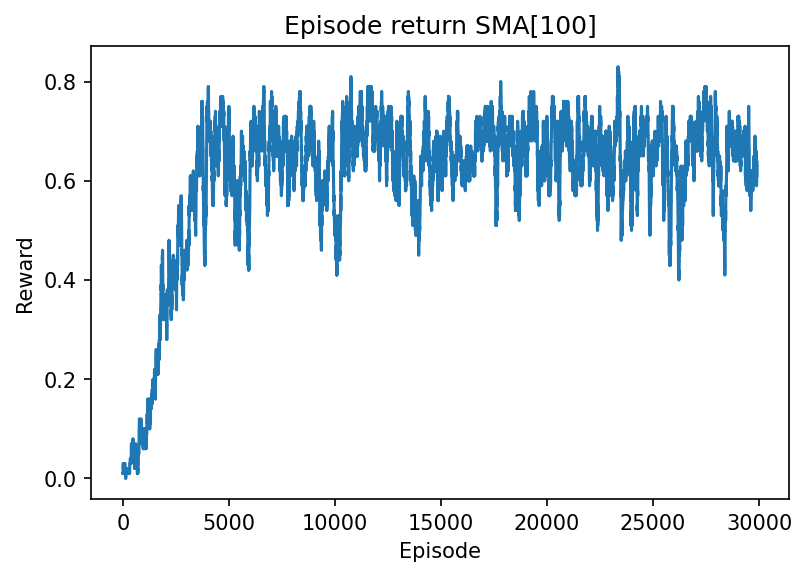

In [7]:
window = 100
average_reward = movingaverage(rewards_total, window)

plt.figure(dpi=150)
plt.title(f"Episode return SMA[{window}]")
plt.ylabel("Reward")
plt.xlabel("Episode")
plt.plot(average_reward)
plt.savefig("episode_return.jpg")

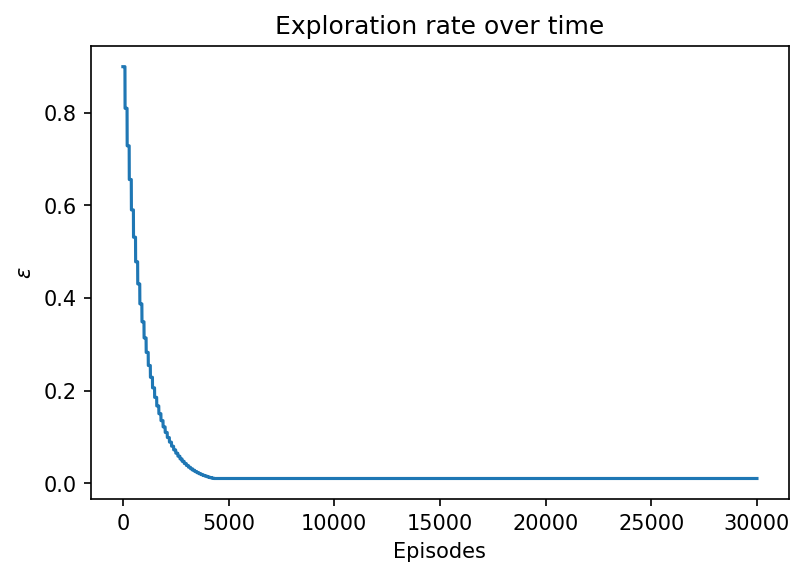

In [8]:
plt.figure(dpi=150)
plt.title(f"Exploration rate over time")
plt.ylabel("$\epsilon$")
plt.xlabel("Episodes")
plt.plot(egreedy_total)